# Project Structure: Zomato Restaurant Data Analysis

## 1. About This Project

In [1]:
# In this project, we aim to analyze Zomato restaurant data to identify key factors
# that contribute to the success of restaurants, as measured by their ratings. 
# By exploring various features such as location, cuisine, pricing, and service offerings, 
# we aim to provide insights that can help restaurant owners and Zomato users make informed decisions.

In [2]:
# First, let's load the dataset and explore its basic characteristics, 
# including dimensions, data types, and missing values. 
# This step is crucial for understanding the structure of the data and planning the analysis accordingly.

import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/SkillCircle/Desktop/Projects/Cap 1 Zomato EDA/Indian-Resturants.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
# Check the dimensions of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 211944 rows and 26 columns.


In [5]:
# Check the data types of each column
print(df.dtypes)

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object


In [6]:
# Check for missing values
print(df.isnull().sum())

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64


# 3. Data Cleaning
## 3.1 Removing Unnecessary Columns

In [7]:
# During the initial exploration, we identified that the 'zipcode' column may not be essential for our analysis.
# We are removing it because 'zipcode' might not provide meaningful insights in the context of city-wide analysis
# or aggregated data we are working with.

# Remove the 'zipcode' column
df.drop(columns=['zipcode'], inplace=True)

# Display the dataset after removing the 'zipcode' column
print("Data after removing 'zipcode' column:")
df.head()  # Display the first few rows of the updated dataset

Data after removing 'zipcode' column:


,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [8]:
# Check for remaining null values in the dataset
print("\nRemaining null values in each column:")
print(df.isnull().sum())


Remaining null values in each column:
res_id                     0
name                       0
establishment              0
url                        0
address                  134
city                       0
city_id                    0
locality                   0
latitude                   0
longitude                  0
country_id                 0
locality_verbose           0
cuisines                1391
timings                 3874
average_cost_for_two       0
price_range                0
currency                   0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
opentable_support         48
delivery                   0
takeaway                   0
dtype: int64


In [9]:
# Display rows where the 'address' column has null values
# missing_addresses = df[df['address'].isnull()]
# missing_addresses

In [10]:
# df[df['address'].isnull()]

In [11]:
# df[df['cuisines'].isnull()]

## Imputation with a Default Address per City:

### Objective: Since you've identified the cities for missing addresses, you can impute missing values with a common address format for each city.
### Action: For each city with missing addresses, create a default address format like "Unknown Address, CityName". This will help retain the data for analysis, especially if the address isn't critical but city-level analysis is.
### Outcome: This approach keeps all rows in your dataset while acknowledging the limitation that the exact address is unknown.

In [12]:
# Example imputation for cities
df.loc[df['city'] == 'Bhopal', 'address'] = df.loc[df['city'] == 'Bhopal', 'address'].fillna('Unknown Address, Bhopal')
df.loc[df['city'] == 'Hyderabad', 'address'] = df.loc[df['city'] == 'Hyderabad', 'address'].fillna('Unknown Address, Hyderabad')
df.loc[df['city'] == 'Junagadh', 'address'] = df.loc[df['city'] == 'Junagadh', 'address'].fillna('Unknown Address, Junagadh')
df.loc[df['city'] == 'Kharagpur', 'address'] = df.loc[df['city'] == 'Kharagpur', 'address'].fillna('Unknown Address, Kharagpur')
df.loc[df['city'] == 'Raipur', 'address'] = df.loc[df['city'] == 'Raipur', 'address'].fillna('Unknown Address, Raipur')
df.loc[df['city'] == 'Udaipur', 'address'] = df.loc[df['city'] == 'Udaipur', 'address'].fillna('Unknown Address, Udaipur')

In [13]:
print(df.isnull().sum())

res_id                     0
name                       0
establishment              0
url                        0
address                    0
city                       0
city_id                    0
locality                   0
latitude                   0
longitude                  0
country_id                 0
locality_verbose           0
cuisines                1391
timings                 3874
average_cost_for_two       0
price_range                0
currency                   0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
opentable_support         48
delivery                   0
takeaway                   0
dtype: int64


In [15]:
# df[df['cuisines'].isnull()]

In [16]:
# # Analyze missing values pattern
# missing_cuisine_by_city = df[df['cuisines'].isnull()]['city'].value_counts()
# print(missing_cuisine_by_city)

### **Approach Options:**

1. **Impute with a General Cuisine Type for the City:**
   - **Objective:** For cities with a large number of missing values (like Junagadh, Gangtok, and Nainital), you could look at the most common cuisine types for those cities and impute the missing values accordingly.
   - **Action:**
     ```python
     # Example: Impute missing cuisines in Junagadh with the most common cuisine in that city
        common_cuisine_junagadh = df[df['city'] == 'Junagadh']['cuisines'].mode()[0]
        df.loc[(df['city'] == 'Junagadh') & (df['cuisines'].isnull()), 'cuisines'] = common_cuisine_junagadh
     ```
   - **Outcome:** This approach helps retain more contextual relevance for the imputed values.

2. **Impute with 'Unknown Cuisine':**
   - **Objective:** If the cuisine data is too scattered or difficult to generalize, you can impute with `"Unknown Cuisine"` for cities with missing values.
   - **Action:**
     ```python
     # Impute missing cuisines with 'Unknown Cuisine'
     df['cuisines'].fillna('Unknown Cuisine', inplace=True)
     ```
   - **Outcome:** This is a simple approach that preserves data but acknowledges the missing information.

3. **Manual Review for Key Cities:**
   - **Objective:** For cities with a smaller number of missing values or significant importance to your analysis, you might manually review and impute the cuisines based on other data or knowledge.
   - **Action:**
     - Review a subset of the data, especially for cities like Amravati, Shimla, Patiala, etc., where the number of missing values is lower.
     - Cross-reference with other available data, such as restaurant names or online sources.
   - **Outcome:** This method can yield more accurate imputation but is more labor-intensive.

4. **Drop Rows for Smaller Cities:**
   - **Objective:** If the cities with missing values represent a small portion of your dataset and are not critical to your analysis, consider dropping those rows.
   - **Action:**
     ```python
     # Drop rows where cuisines are missing
     df.dropna(subset=['cuisines'], inplace=True)
     ```
   - **Outcome:** This will simplify your dataset but reduce the sample size.

### **Recommendation:**

- **For Larger Cities with Many Missing Values:** Impute based on the most common cuisine in that city (Option 1).
- **For Smaller Cities:** Use a general imputation like `"Unknown Cuisine"` (Option 2).
- **For Very Small Subsets:** Consider manual review or dropping those rows (Option 3 or 4).

# You might start with a mix of Options 1 and 2 to balance data retention and accuracy.

Here’s how you can approach in order to handling the remaining null values in your dataset:

### 1. **`address` (134 null values)**
- **Approach**: Since the `address` column might be critical for location-based analysis, try to fill in missing addresses if possible. If not, you could consider dropping the rows with missing addresses if they represent a small fraction of the data.
  - **Option 1**: Impute with a common or nearby address if applicable.
  - **Option 2**: Drop the rows with null values in the `address` column.
  
### 2. **`cuisines` (1,391 null values)**
- **Approach**: The `cuisines` column is important for understanding the type of food offered, which could correlate with ratings. Consider filling in missing values with a placeholder like "Unknown" or "Other," or impute based on similar restaurants if possible.
  - **Option 1**: Fill with a placeholder ("Unknown").
  - **Option 2**: Use the most common cuisine in the respective locality or city to impute missing values.
  
### 3. **`timings` (3,874 null values)**
- **Approach**: Timings might be useful for analyzing business hours, but it's often difficult to impute accurately. If timing data is essential, fill missing values with a placeholder like "Not available."
  - **Option 1**: Fill with "Not available."
  - **Option 2**: Drop the column if it's not critical to your analysis and the null values are significant.
  
### 4. **`opentable_support` (48 null values)**
- **Approach**: This column likely indicates whether a restaurant supports OpenTable bookings. You can fill in the missing values with "No" or "Unknown," assuming the absence of data could indicate no support for this feature.
  - **Option 1**: Fill with "No" or "Unknown."
  - **Option 2**: Drop the rows with null values if this feature is critical for analysis.

### Example Code for Handling Null Values:

```python
# Fill missing 'address' values (Option 2)
df.dropna(subset=['address'], inplace=True)

# Fill missing 'cuisines' values with 'Unknown'
df['cuisines'].fillna('Unknown', inplace=True)

# Fill missing 'timings' values with 'Not available'
df['timings'].fillna('Not available', inplace=True)

# Fill missing 'opentable_support' values with 'No'
df['opentable_support'].fillna('No', inplace=True)

# Check if all null values are handled
print("Remaining null values in each column:")
print(df.isnull().sum())
```

### Summary:
- **Address**: Consider dropping rows with missing addresses if they are not too many.
- **Cuisines**: Fill with a placeholder to maintain the integrity of the data.
- **Timings**: Use a placeholder if timing is not a critical part of the analysis.
- **OpenTable Support**: Assume "No" or "Unknown" for missing values unless more data can be gathered.

This strategy ensures that your dataset remains usable while dealing with missing data effectively.

In [14]:
# Fill missing 'cuisines' values with 'Unknown'
df['cuisines'].fillna('Unknown', inplace=True)

# Fill missing 'timings' values with 'Not available'
df['timings'].fillna('Not available', inplace=True)

# Convert 'opentable_support' column to string type and fill missing values with 'No'
df['opentable_support'] = df['opentable_support'].astype(str)
df['opentable_support'].fillna('No', inplace=True)

# Check if all null values are handled
print("Remaining null values in each column:")
print(df.isnull().sum())


Remaining null values in each column:
res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64


In [15]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [54]:
df.isnull().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [17]:
# Save the DataFrame to a CSV file
# df.to_csv('C:/Users/SkillCircle/Desktop/Projects/Cap 1 Zomato EDA/New_data.csv', index=False)

# 4. Basic Statistics
## 4.1 Calculate and Visualize Average Rating

The average restaurant rating is 3.40


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


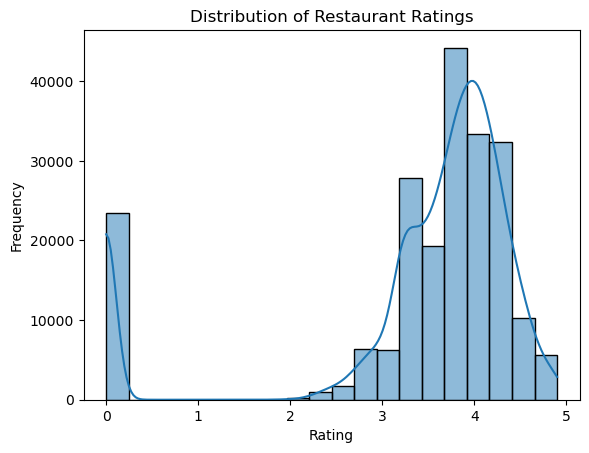

In [18]:
# To understand the overall rating landscape, we will calculate and visualize the average rating of restaurants.
# This helps to establish a baseline for what is considered a 'good' or 'bad' rating in the dataset.

# Calculate the average rating
average_rating = df['aggregate_rating'].mean()
print(f"The average restaurant rating is {average_rating:.2f}")

# Visualize the distribution of restaurant ratings
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 5. Location Analysis
## 5.1 Identify City with the Highest Concentration of Restaurants

In [62]:
# Location plays a significant role in a restaurant's success. 
# We will identify which city has the highest number of restaurants to understand market saturation.

# Count the number of restaurants per city
city_counts = df['city'].value_counts()
print(city_counts.head(10))  # Display the top 10 cities with the most restaurants

city
Chennai      11630
Mumbai        6497
Bangalore     4971
Pune          4217
Lucknow       4121
Jabalpur      3994
New Delhi     3918
Jaipur        3713
Kochi         3370
Ajmer         3277
Name: count, dtype: int64


## 5.2 Visualize Distribution of Restaurant Ratings Across Different Cities

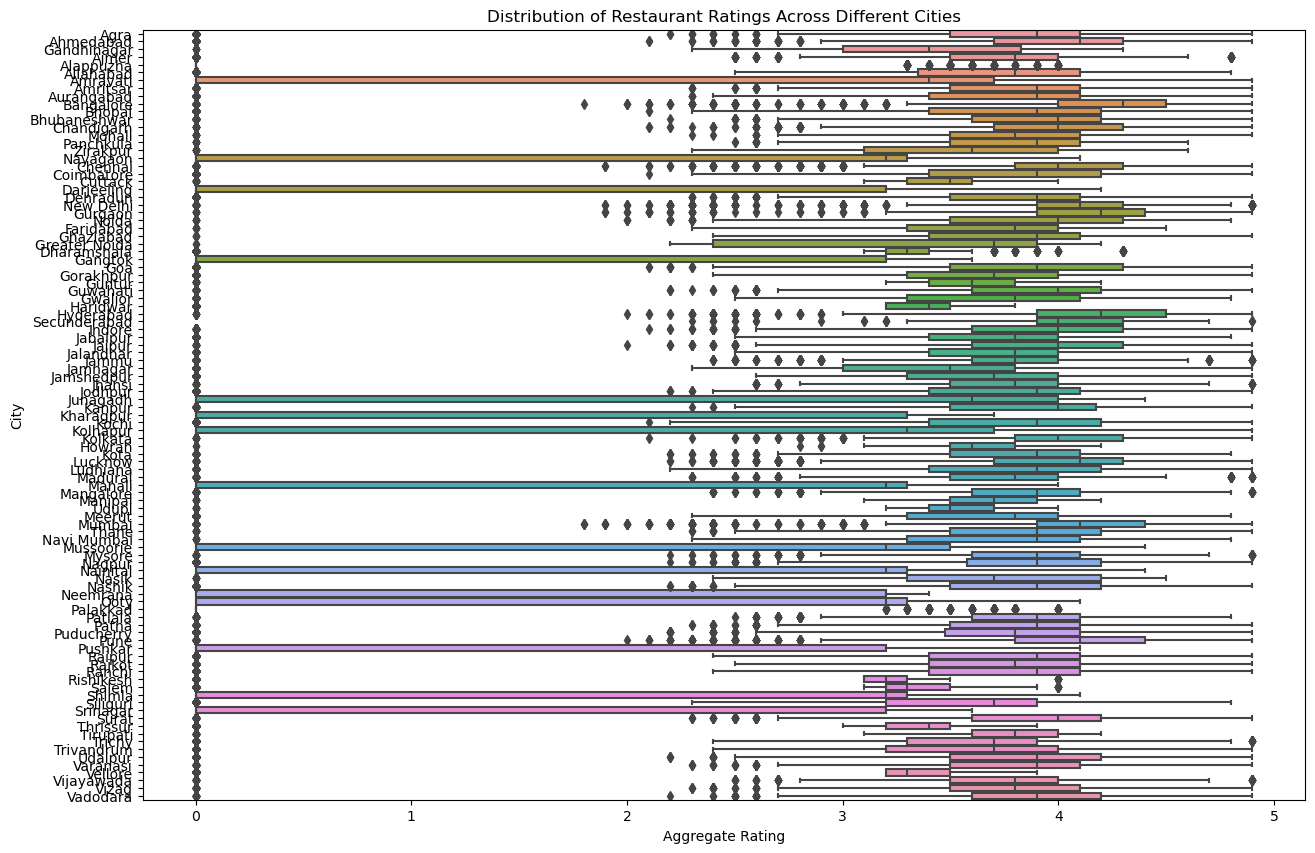

In [63]:
# Visualizing the distribution of ratings across different cities helps us understand 
# how ratings vary by location, which could indicate regional differences in customer expectations or service quality.

plt.figure(figsize=(15, 10))
sns.boxplot(y='city', x='aggregate_rating', data=df)
plt.title('Distribution of Restaurant Ratings Across Different Cities')
plt.xlabel('Aggregate Rating')
plt.ylabel('City')
plt.show()

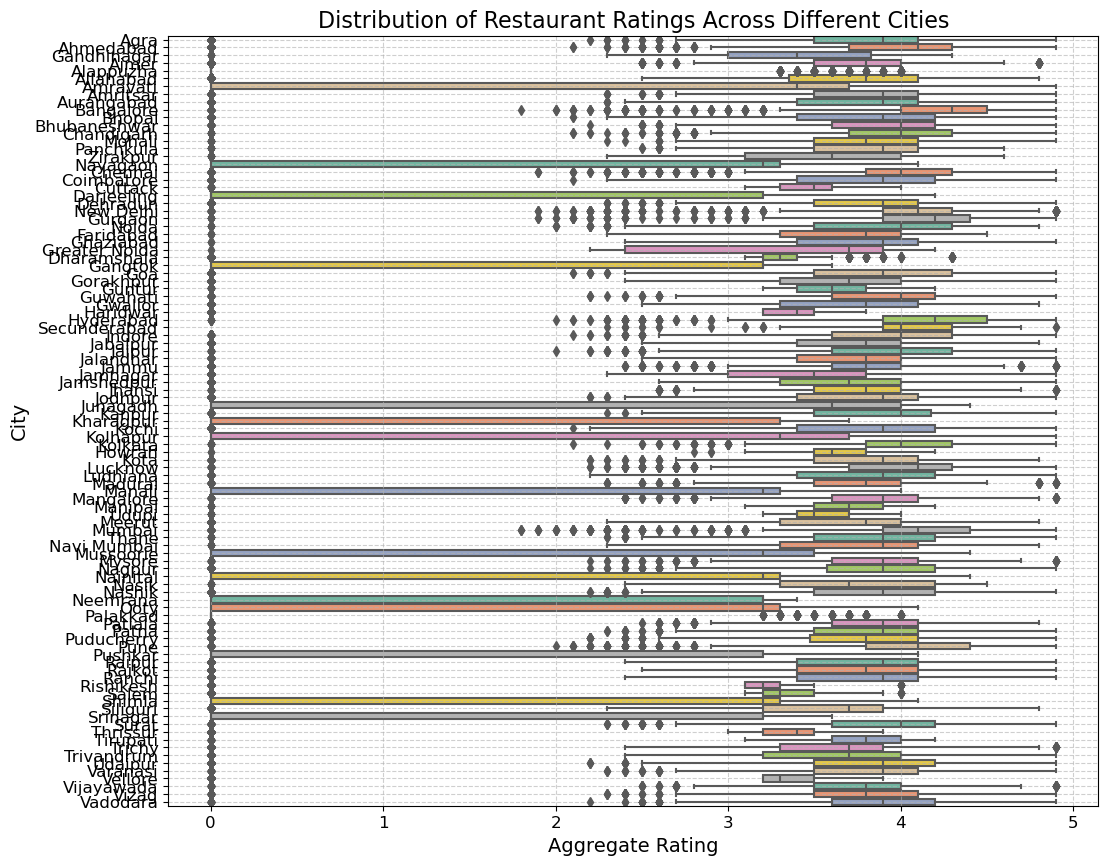

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a color palette
palette = sns.color_palette("Set2", n_colors=len(df['city'].unique()))

# Create the figure with an appropriate size
plt.figure(figsize=(12, 10))

# Create the boxplot with the custom palette
sns.boxplot(y='city', x='aggregate_rating', data=df, palette=palette)

# Add title and labels with larger font sizes
plt.title('Distribution of Restaurant Ratings Across Different Cities', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('City', fontsize=14)

# Improve the layout and readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

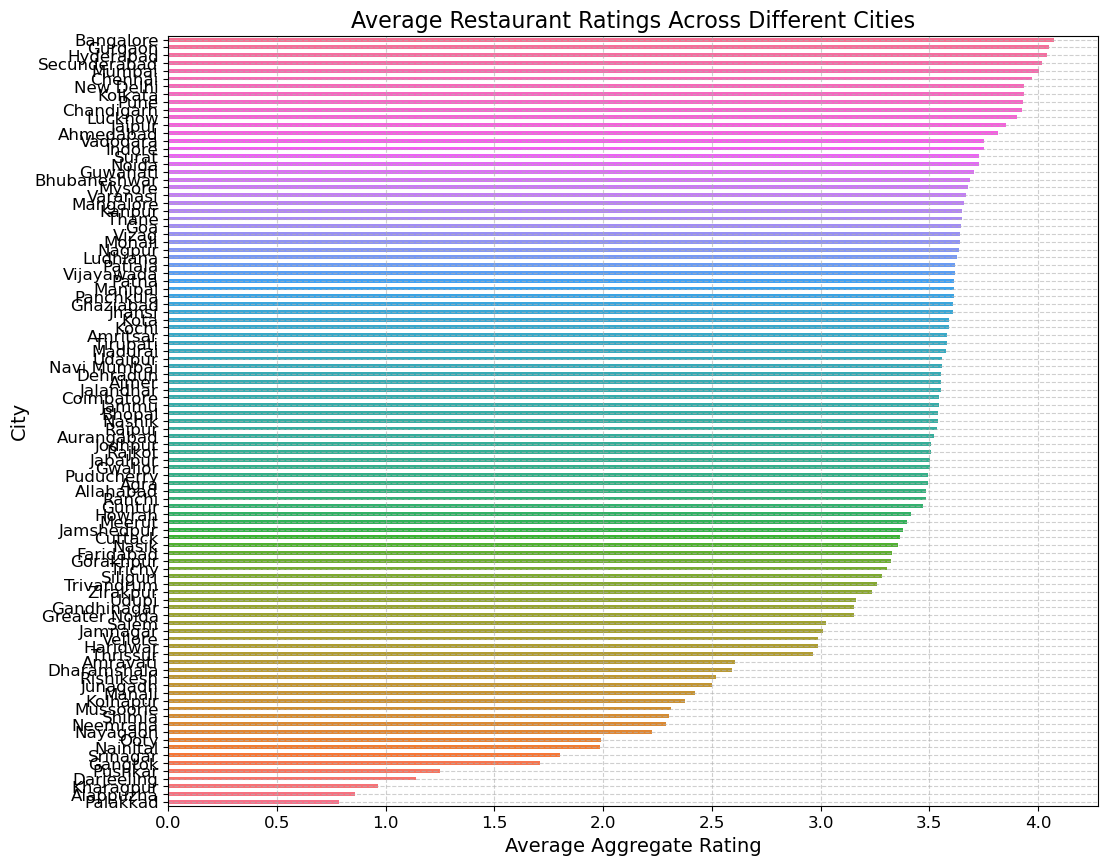

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average rating per city
city_avg_ratings = df.groupby('city')['aggregate_rating'].mean().sort_values()

# Set a color palette
palette = sns.color_palette("husl", n_colors=len(city_avg_ratings))

# Create the figure with an appropriate size
plt.figure(figsize=(12, 10))

# Plot the bar graph with the custom palette
city_avg_ratings.plot(kind='barh', color=palette)

# Add title and labels with larger font sizes
plt.title('Average Restaurant Ratings Across Different Cities', fontsize=16)
plt.xlabel('Average Aggregate Rating', fontsize=14)
plt.ylabel('City', fontsize=14)

# Improve the layout and readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


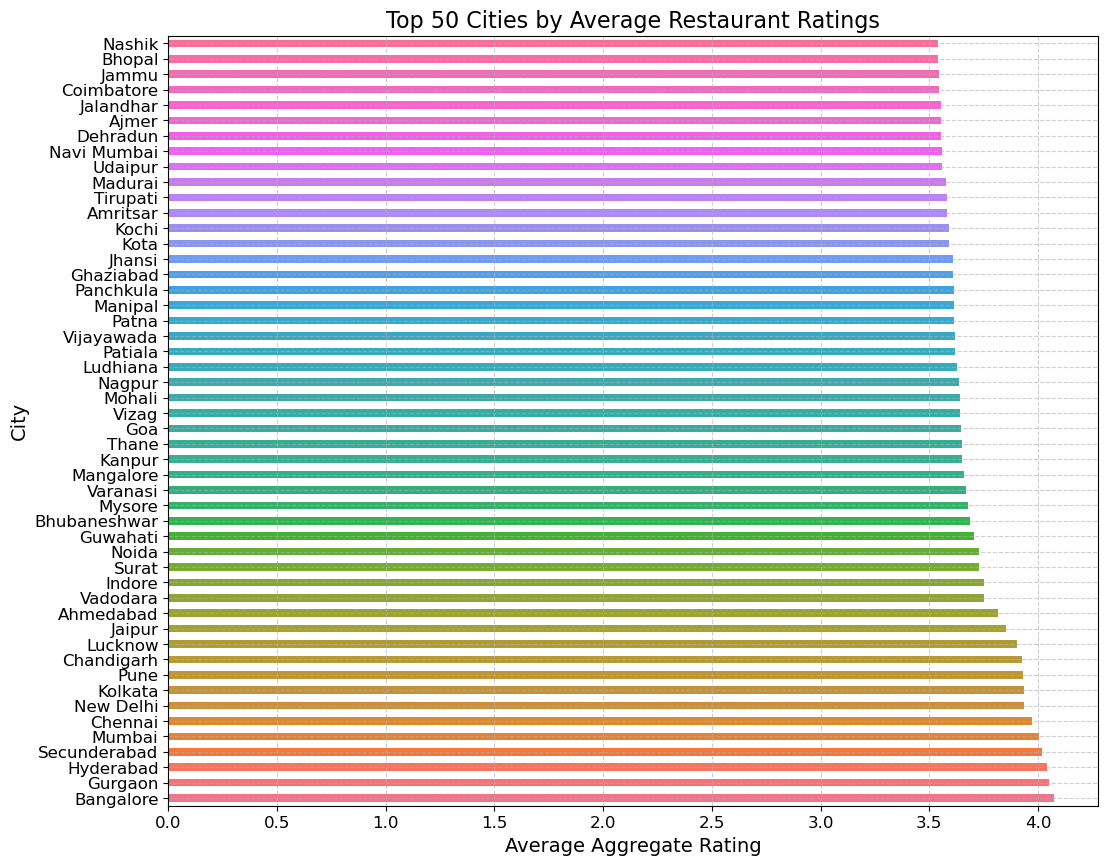

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average rating per city and sort them
city_avg_ratings = df.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False)

# Select the top 50 cities
top_50_cities = city_avg_ratings.head(50)

# Set a color palette
palette = sns.color_palette("husl", n_colors=len(top_50_cities))

# Create the figure with an appropriate size
plt.figure(figsize=(12, 10))

# Plot the bar graph with the custom palette
top_50_cities.plot(kind='barh', color=palette)

# Add title and labels with larger font sizes
plt.title('Top 50 Cities by Average Restaurant Ratings', fontsize=16)
plt.xlabel('Average Aggregate Rating', fontsize=14)
plt.ylabel('City', fontsize=14)

# Improve the layout and readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

# 6. Cuisine Analysis
## 6.1 Determine the Most Popular Cuisines

In [67]:
# Cuisines offered by a restaurant can be a significant factor in its success.
# We will determine which cuisines are the most popular to provide insights into customer preferences.

# Count the frequency of each cuisine
cuisine_counts = df['cuisines'].value_counts()
print(cuisine_counts.head(20))  # Display the top 10 most popular cuisines

cuisines
North Indian                          15996
Fast Food                              6721
Cafe                                   6190
North Indian, Chinese                  5820
South Indian                           5217
Pizza, Fast Food                       4075
Bakery                                 3238
Street Food                            2837
Biryani                                2118
Chinese                                2116
Mithai                                 1999
Burger, Fast Food                      1824
Desserts                               1755
Finger Food                            1739
Beverages                              1611
Cafe, Fast Food                        1494
Bakery, Desserts                       1438
Unknown                                1391
North Indian, Chinese, Continental     1358
North Indian, Mughlai                  1343
Name: count, dtype: int64


## 6.2 Analyze Correlation Between Variety of Cuisines and Restaurant Ratings

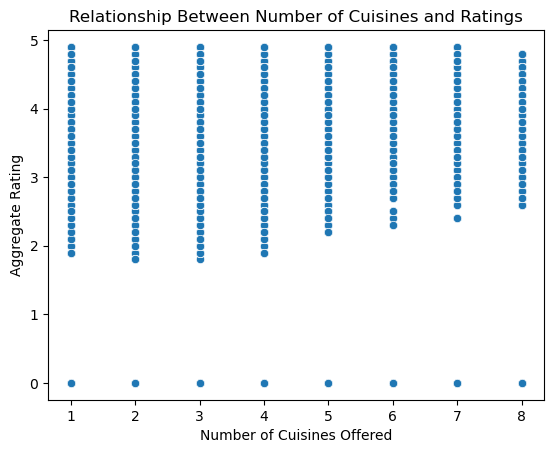

In [68]:
# We will investigate whether offering a variety of cuisines correlates with higher restaurant ratings.
# This analysis can reveal if a diverse menu positively impacts customer satisfaction.

# # Calculate the number of cuisines offered by each restaurant
# df['num_cuisines'] = df['cuisines'].apply(lambda x: len(x.split(',')))

# # Visualize the relationship between the number of cuisines and ratings
# sns.scatterplot(x='num_cuisines', y='aggregate_rating', data=df)
# plt.title('Relationship Between Number of Cuisines and Ratings')
# plt.xlabel('Number of Cuisines Offered')
# plt.ylabel('Aggregate Rating')
# plt.show()

# Calculate the number of cuisines offered by each restaurant, handling NaN or non-string values
df['num_cuisines'] = df['cuisines'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Visualize the relationship between the number of cuisines and ratings
sns.scatterplot(x='num_cuisines', y='aggregate_rating', data=df)
plt.title('Relationship Between Number of Cuisines and Ratings')
plt.xlabel('Number of Cuisines Offered')
plt.ylabel('Aggregate Rating')
plt.show()

# 7. Price Range and Rating
## 7.1 Analyze Relationship Between Price Range and Ratings

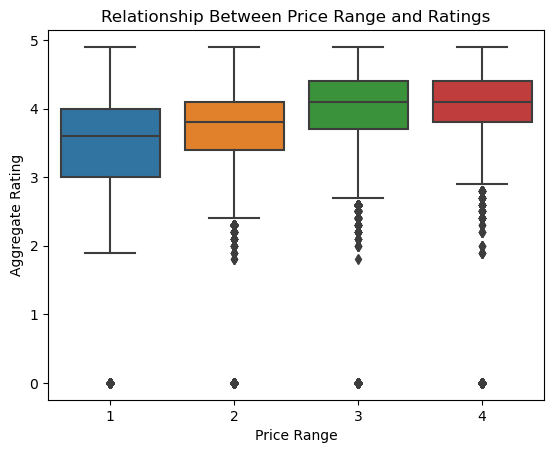

In [69]:
# Price is a key factor in customer decision-making.
# We will analyze the relationship between the restaurant's price range and their ratings to understand customer perceptions of value for money.

# Visualize the relationship between price range and ratings
sns.boxplot(x='price_range', y='aggregate_rating', data=df)
plt.title('Relationship Between Price Range and Ratings')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

# 8. Online Order and Table Booking
## 8.1 Impact of Online Order Availability on Restaurant Ratings

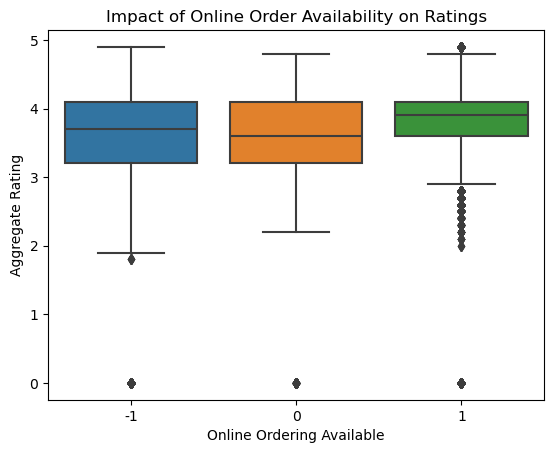

In [70]:
# The availability of online orders might affect customer satisfaction and ratings.
# We will investigate this relationship to determine if offering online ordering is beneficial for restaurants.

# Visualize the impact of online ordering on ratings
sns.boxplot(x='delivery', y='aggregate_rating', data=df)
plt.title('Impact of Online Order Availability on Ratings')
plt.xlabel('Online Ordering Available')
plt.ylabel('Aggregate Rating')
plt.show()

## 8.2 Analyze Distribution of Restaurants Offering Table Booking

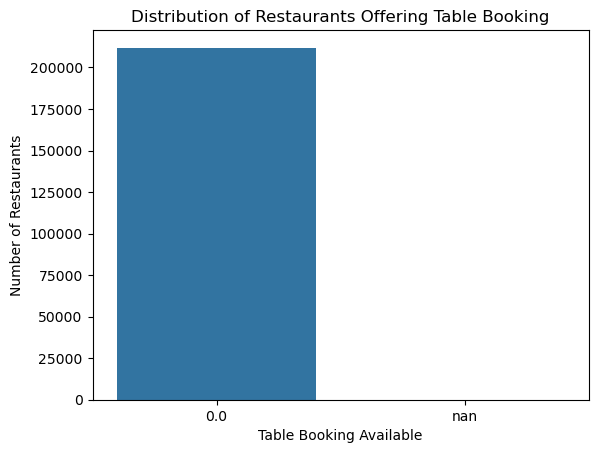

In [71]:
# Similar to online orders, the availability of table booking could influence customer preferences and ratings.
# We will analyze this distribution to understand its significance.

# Visualize the distribution of restaurants offering table booking
sns.countplot(x='opentable_support', data=df)
plt.title('Distribution of Restaurants Offering Table Booking')
plt.xlabel('Table Booking Available')
plt.ylabel('Number of Restaurants')
plt.show()

# 9. Top Restaurant Chains
## 9.1 Identify and Visualize Top Restaurant Chains

name
Domino's Pizza        3108
KFC                   1343
Cafe Coffee Day       1068
Pizza Hut              936
Subway                 766
Barbeque Nation        725
Burger King            658
McDonald's             578
Keventers              512
The Chocolate Room     461
Name: count, dtype: int64


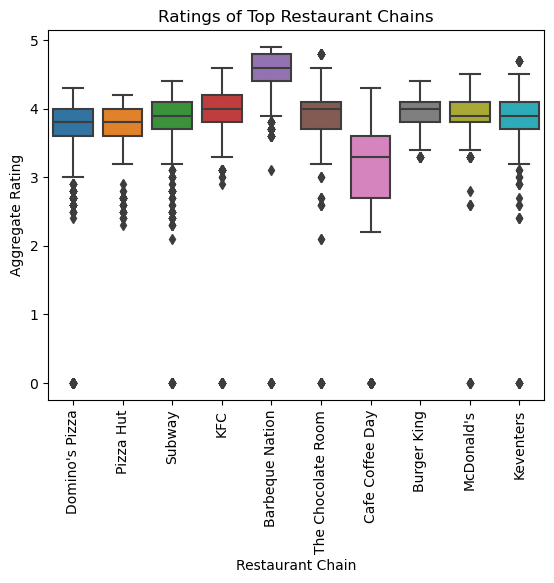

In [72]:
# Some restaurant chains have multiple outlets and are widely recognized.
# We will identify the top restaurant chains based on the number of outlets and explore their ratings to see if they maintain consistency.

# Count the number of outlets per restaurant chain
chain_counts = df['name'].value_counts()
print(chain_counts.head(10))  # Display the top 10 restaurant chains by number of outlets

# Visualize the ratings of top restaurant chains
top_chains = chain_counts.index[:10]
df_top_chains = df[df['name'].isin(top_chains)]

sns.boxplot(x='name', y='aggregate_rating', data=df_top_chains)
plt.title('Ratings of Top Restaurant Chains')
plt.xlabel('Restaurant Chain')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

# 10. Restaurant Features
## 10.1 Analyze Distribution Based on Features (e.g., Wi-Fi, Alcohol Availability)

In [73]:
# Explode the 'highlights' column to separate each feature into different rows
df_exploded = df.explode('highlights')

In [82]:
# Get the top 50 most frequent features
top_features = df_exploded['highlights'].value_counts().nlargest(50).index

# Filter the dataframe to include only these top features
df_filtered = df_exploded[df_exploded['highlights'].isin(top_features)]

# Create dummy variables for these filtered features
df_features = pd.get_dummies(df_filtered['highlights'], prefix='feature')

# Combine these dummy variables back with the original dataframe
df_combined = pd.concat([df_filtered, df_features], axis=1)

In [83]:
print(df_combined.columns)

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'country_id', 'locality_verbose',
       'cuisines', 'timings', 'average_cost_for_two', 'price_range',
       'currency', 'highlights', 'aggregate_rating', 'rating_text', 'votes',
       'photo_count', 'opentable_support', 'delivery', 'takeaway',
       'num_cuisines',
       'feature_['Breakfast', 'Dinner', 'Takeaway Available', 'Cash', 'Lunch', 'Indoor Seating', 'Pure Veg']',
       'feature_['Cash', 'Dinner', 'Takeaway Available', 'Lunch', 'Indoor Seating']',
       'feature_['Cash', 'Takeaway Available', 'Delivery', 'Indoor Seating']',
       'feature_['Cash', 'Takeaway Available', 'Delivery']',
       'feature_['Cash', 'Takeaway Available', 'Indoor Seating']',
       'feature_['Cash', 'Takeaway Available']', 'feature_['Cash']',
       'feature_['Delivery', 'Cash', 'Takeaway Available', 'Indoor Seating', 'Desserts and Bakes']',
       'feature_['Dinner', 'Cash'

The above approach can be handled like this:

### 1. **Limit the Number of Features**
   - You can reduce the number of unique features by focusing only on the most common ones.

```python
# Get the top 50 most frequent features
top_features = df_exploded['highlights'].value_counts().nlargest(50).index

# Filter the dataframe to include only these top features
df_filtered = df_exploded[df_exploded['highlights'].isin(top_features)]

# Create dummy variables for these filtered features
df_features = pd.get_dummies(df_filtered['highlights'], prefix='feature')

# Combine these dummy variables back with the original dataframe
df_combined = pd.concat([df_filtered, df_features], axis=1)
```

### 2. **Use Sparse Dummies**
   - You can create sparse dummy variables to reduce memory usage.

```python
# Create sparse dummy variables for the 'highlights' column
df_features = pd.get_dummies(df_exploded['highlights'], prefix='feature', sparse=True)

# Combine these sparse dummy variables back with the original dataframe
df_combined = pd.concat([df_exploded, df_features], axis=1)
```

### 3. **Aggregate Features**
   - Instead of creating individual dummy variables for each unique feature, you can aggregate similar features into broader categories.

```python
# Create a mapping for aggregation
feature_mapping = {
    'Alcohol': ['Serves Alcohol', 'No Alcohol Available'],
    'Seating': ['Indoor Seating', 'Outdoor Seating', 'Standing Tables'],
    'Payment': ['Cash', 'Credit Card', 'Debit Card', 'Digital Payments Accepted'],
    # Add more categories as needed
}

# Create a new column for each category
for category, features in feature_mapping.items():
    df_exploded[category] = df_exploded['highlights'].apply(lambda x: any(item in x for item in features))

# Drop the original 'highlights' column if needed
df_exploded.drop(columns=['highlights'], inplace=True)
```

### 4. **Use Category Encoders**
   - You can also consider using category encoders that reduce memory usage, like `OneHotEncoder` with `sparse` option.

```python
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with sparse=True
encoder = OneHotEncoder(sparse=True)

# Transform the 'highlights' column
df_features = encoder.fit_transform(df_exploded[['highlights']])

# Convert sparse matrix to dataframe
df_features = pd.DataFrame.sparse.from_spmatrix(df_features, columns=encoder.get_feature_names_out())

# Combine these sparse features back with the original dataframe
df_combined = pd.concat([df_exploded.reset_index(drop=True), df_features], axis=1)
```

Using any of these methods should help you manage memory more efficiently and allow you to proceed with your analysis.

In [84]:
# You can create sparse dummy variables to reduce memory usage.
# Create sparse dummy variables for the 'highlights' column
df_features = pd.get_dummies(df_exploded['highlights'], prefix='feature', sparse=True)

# Combine these sparse dummy variables back with the original dataframe
df_combined = pd.concat([df_exploded, df_features], axis=1)

In [ ]:
# Some features like Wi-Fi availability, alcohol serving, etc., might influence customer ratings.
# We will analyze the distribution of these features and see if they correlate with higher ratings.

# Analyze and visualize the impact of specific features on ratings (e.g., alcohol availability)
sns.boxplot(x='highlights', y='aggregate_rating', data=df)
plt.title('Impact of Restaurant Features on Ratings')
plt.xlabel('Feature')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

# 11. Word Cloud for Reviews
## 11.1 Create Word Cloud Based on Customer Reviews

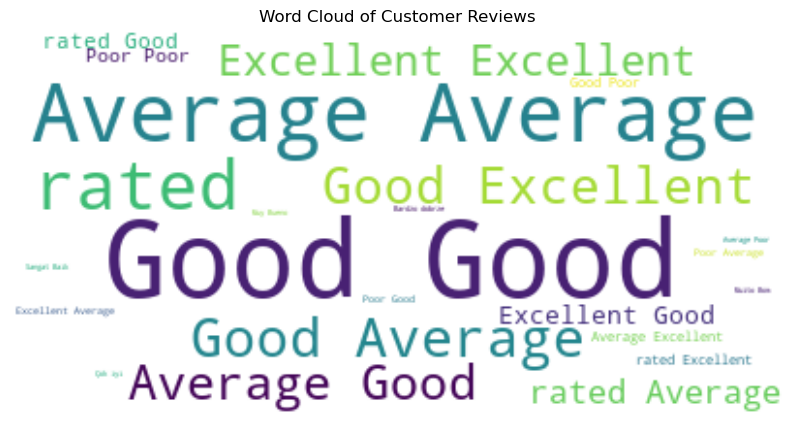

In [67]:
# Customer reviews provide valuable insights into what customers like or dislike about a restaurant.
# We will create a word cloud to visualize the most commonly mentioned words in the reviews.

from wordcloud import WordCloud

# Combine all reviews into a single string
reviews_text = " ".join(review for review in df['rating_text'])

# Generate and visualize the word cloud
wordcloud = WordCloud(background_color="white").generate(reviews_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews')
plt.show()

# 12. Seasonal Trends
## 12.1 Explore Seasonal Trends in Restaurant Ratings or User Reviews

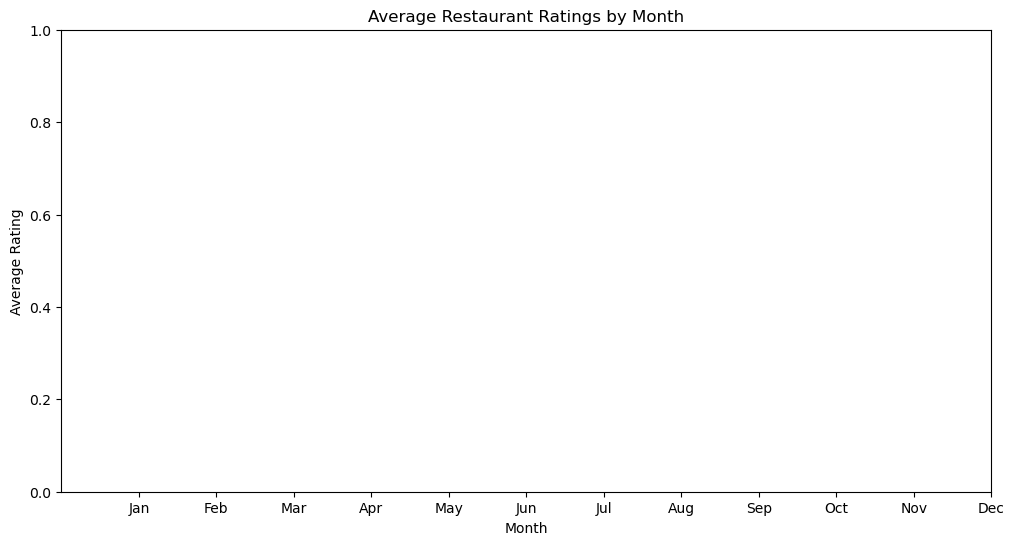

In [69]:
# Understanding seasonal trends can help restaurants plan their marketing and promotions better.
# We will explore if there are any seasonal patterns in ratings or user reviews.

df['month'] = pd.to_datetime(df['timings'], errors='coerce').dt.month
df.dropna(subset=['month'], inplace=True)

monthly_ratings = df.groupby('month')['aggregate_rating'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_ratings.index, y=monthly_ratings.values, marker='o')
plt.title('Average Restaurant Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# 13. Conclusion

In [ ]:
# Summarizing the key findings and insights obtained from the analysis:
# This includes recommendations for restaurant owners and Zomato users based on the identified success factors.

# Key Findings:
# 1. City-wise distribution: Highlight key cities with the most restaurants and their rating trends.
# 2. Popular cuisines: Identify the most favored cuisines and their impact on ratings.
# 3. Price range correlation: Discuss how pricing affects customer ratings.
# 4. Importance of online order and table booking features.
# 5. Analysis of top restaurant chains and their consistency in ratings.
# 6. The impact of specific restaurant features on customer ratings.
# 7. Sentiments from customer reviews.
# 8. Identifying any seasonal trends in ratings or customer preferences.

# Recommendations for restaurant owners:
# - Focus on popular cuisines.
# - Offer competitive pricing.
# - Ensure online ordering and table booking features are available.
# - Maintain consistent quality across outlets for chains.
# - Regularly monitor customer reviews to address concerns and improve services.
# - Plan seasonal promotions based on identified trends.

# Final Summary:
# The insights gained from this analysis provide valuable guidance for restaurant owners and Zomato users.
# By understanding the factors that contribute to restaurant success, stakeholders can make informed decisions that 
# enhance customer satisfaction and drive business growth.